In [73]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss


# Importation Modele

In [3]:
#Creation RandomForest
myForest=RandomForestClassifier()

In [4]:
#Sauvegarde du random
filename = 'randomforest.sav'
pickle.dump(myForest, open(filename, 'wb'))


In [5]:
#Chargement
m=pickle.load(open("randomforest.sav","rb"))

# Importation Base

In [89]:
test=pd.read_csv("../../../Database/Kaggle/Train_rev1.csv")
#On supprime les elements suivants pour l'instant
test=test.drop(columns=["SalaryRaw","Id","Title",'FullDescription',"LocationRaw"])
test.head()

,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk
1,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
2,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
3,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500,cv-library.co.uk
4,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk


## Quelques Traitement pour rendre binaire la base

In [23]:
#On veut pas perdre d'information quand l'employeur ne spécifie pas le temps de contract
test["ContractTime"].fillna("Nospecif", inplace = True) 
contracttime=pd.get_dummies(test["ContractTime"])
test=pd.concat((test,contracttime),axis=1)

In [27]:
#binairisation de Category
Category=pd.get_dummies(test["Category"])
test=pd.concat((test,Category),axis=1)
#binairisation de ContractType 
test["ContractType"].fillna("NospecifContractType", inplace = True) 
ContractType=pd.get_dummies(test["ContractType"])
test=pd.concat((test,ContractType),axis=1)



In [ ]:
#Location
#Très couteux attention ne pas le faire
Location=pd.get_dummies(test["LocationNormalized"])
test=pd.concat((test,Location),axis=1)

In [ ]:
#Suppression des colonnes
test=test.drop(columns=["ContractType","ContractTime","Company",'LocationNormalized',"ContractType","Category","SourceName"])



In [ ]:
#Essaie avec un réseaux de neurones

In [70]:

clf_10 = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(50), random_state=1, activation='relu', max_iter=100, learning_rate_init=0.01)


In [51]:
X_train=test.drop(columns=["SalaryNormalized"])
Y_train=test["SalaryNormalized"]

In [ ]:
Sql traitement: bcp de requetes quel forme
PowerBI: Datanalyse
Interagir avec pandas numpy
Selenium 
python


In [71]:

clf_10.fit(X_train.loc[:1000],Y_train.loc[:1000])


/home/brami/Bureau/Projet_language_dynamique/virtualenv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
clf_10.score(X_train.loc[:1000],Y_train.loc[:1000])

0.055944055944055944

In [77]:
clf_10.predict(X_train.loc[50:60])

array([18000, 25000, 25000, 25000, 25000, 25000, 25000, 25000, 25000,
       25000, 25000])

In [78]:
Y_train.loc[50:60]

50    24000
51    35000
52    30000
53    25000
54    28500
55    27500
56    25000
57    50000
58    50000
59    27500
60    25000
Name: SalaryNormalized, dtype: int64

In [ ]:
liste=['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category',
        'SourceName']

In [ ]:
liste=pd.read_csv("../../../Database/Kaggle/Test_rev1.csv")

In [ ]:
test=test.dropna()
y_test=test["SalaryNormalized"]
x_test=test[liste.columns]

In [ ]:
liste.columns

In [ ]:
m.score(x_test,y_test)

In [95]:
test

,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName,Nospecif,contract,permanent,...,Retail Jobs,Sales Jobs,Scientific & QA Jobs,Social work Jobs,Teaching Jobs,Trade & Construction Jobs,Travel Jobs,NospecifContractType,full_time,part_time
0,Dorking,NospecifContractType,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,Glasgow,NospecifContractType,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,Hampshire,NospecifContractType,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Surrey,NospecifContractType,permanent,Gregory Martin International,Engineering Jobs,27500,cv-library.co.uk,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,Surrey,NospecifContractType,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244763,Swindon,NospecifContractType,contract,NaN,Teaching Jobs,22800,hays.co.uk,0,1,0,...,0,0,0,0,1,0,0,1,0,0
244764,Swindon,NospecifContractType,contract,NaN,Teaching Jobs,22800,hays.co.uk,0,1,0,...,0,0,0,0,1,0,0,1,0,0
244765,Swindon,NospecifContractType,contract,NaN,Teaching Jobs,22800,hays.co.uk,0,1,0,...,0,0,0,0,1,0,0,1,0,0
244766,Wiltshire,NospecifContractType,contract,NaN,Teaching Jobs,22800,hays.co.uk,0,1,0,...,0,0,0,0,1,0,0,1,0,0


# nuage de point pour fais beau et pour faire sortir une quelquoncque correlation

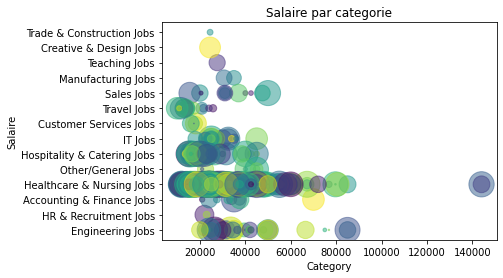

In [91]:
notes_moyennes=test["Category"].loc[:1000].to_numpy()
votans=test["SalaryNormalized"].loc[:1000].to_numpy()

""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Salaire par categorie')
plt.xlabel('Category')
plt.ylabel('Salaire')
plt.show()

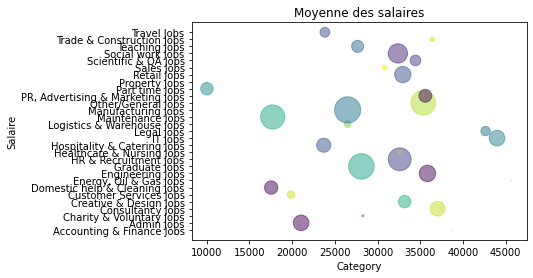

In [92]:
notes_moyennes=test["Category"].loc[:1000].to_numpy()
votans=test["SalaryNormalized"].loc[:1000].to_numpy()

notes_moyennes=test.groupby("Category").mean().reset_index()["Category"]
votans=test.groupby("Category").mean().reset_index()["SalaryNormalized"]
""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Moyenne des salaires')
plt.xlabel('Category')
plt.ylabel('Salaire')
plt.show()

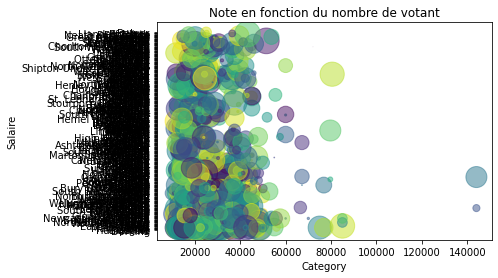

In [94]:
notes_moyennes=test["LocationNormalized"].loc[:1000].to_numpy()
votans=test["SalaryNormalized"].loc[:1000].to_numpy()

""" ici je visualise la note moyenne des films en fonction du nombres de votants
"""

colors=np.random.rand(len(votans))
area= np.pi * (15 * np.random.rand(len(votans)))**2
#En abcisse on veut les votans , et en ordonnée les notes
plt.scatter(votans,notes_moyennes,s=area, c=colors, alpha=0.5)

plt.title('Salaire par endroit')
plt.xlabel('Category')
plt.ylabel('Salaire')
plt.show()

In [95]:
#Correlation par category

In [97]:
corr=test.groupby("Category").mean().reset_index().corr(method ='kendall')
corr

,SalaryNormalized
SalaryNormalized,1.0


In [146]:
corr.loc["SalaryNormalized"]>0.4

index                               False
Id                                  False
SalaryNormalized                     True
Nospecif                            False
contract                            False
permanent                           False
Accounting & Finance Jobs           False
Admin Jobs                          False
Charity & Voluntary Jobs            False
Consultancy Jobs                    False
Creative & Design Jobs              False
Customer Services Jobs              False
Domestic help & Cleaning Jobs       False
Energy, Oil & Gas Jobs              False
Engineering Jobs                    False
Graduate Jobs                       False
HR & Recruitment Jobs               False
Healthcare & Nursing Jobs           False
Hospitality & Catering Jobs         False
IT Jobs                             False
Legal Jobs                          False
Logistics & Warehouse Jobs          False
Maintenance Jobs                    False
Manufacturing Jobs                

In [147]:
corr.loc["SalaryNormalized"]<-0.3

index                               False
Id                                  False
SalaryNormalized                    False
Nospecif                            False
contract                            False
permanent                           False
Accounting & Finance Jobs           False
Admin Jobs                          False
Charity & Voluntary Jobs            False
Consultancy Jobs                    False
Creative & Design Jobs              False
Customer Services Jobs              False
Domestic help & Cleaning Jobs       False
Energy, Oil & Gas Jobs              False
Engineering Jobs                    False
Graduate Jobs                       False
HR & Recruitment Jobs               False
Healthcare & Nursing Jobs           False
Hospitality & Catering Jobs         False
IT Jobs                             False
Legal Jobs                          False
Logistics & Warehouse Jobs          False
Maintenance Jobs                    False
Manufacturing Jobs                

In [142]:
corr.loc["SalaryNormalized"]

Id                                  0.137931
SalaryNormalized                    1.000000
Nospecif                           -0.325123
contract                           -0.014778
permanent                           0.423645
Accounting & Finance Jobs           0.206339
Admin Jobs                         -0.187581
Charity & Voluntary Jobs           -0.056274
Consultancy Jobs                    0.187581
Creative & Design Jobs              0.075032
Customer Services Jobs             -0.206339
Domestic help & Cleaning Jobs      -0.243855
Energy, Oil & Gas Jobs              0.262613
Engineering Jobs                    0.150064
Graduate Jobs                      -0.075032
HR & Recruitment Jobs               0.037516
Healthcare & Nursing Jobs           0.018758
Hospitality & Catering Jobs        -0.168823
IT Jobs                             0.243855
Legal Jobs                          0.225097
Logistics & Warehouse Jobs         -0.131306
Maintenance Jobs                   -0.225097
Manufactur

In [ ]:
#Correlation par Location

In [ ]:
corr=test.groupby("LocationNormalized").mean().reset_index().corr(method ='kendall')
corr

In [ ]:
corr.loc["SalaryNormalized"]>0.4

In [ ]:
corr.loc["SalaryNormalized"]<-0.3

# Regression Lineaire

In [ ]:
X=test.drop(columns=["SalaryNormalized"])
Y=test["SalaryNormalized"]

In [ ]:
X_train ,  X_test ,  y_train ,  y_test  =  train_test_split ( X ,  Y ,  test_size = 0.33 ,  random_state = 42 )
reg = LinearRegression().fit(X_train, y_train)#fit entraine et remplace X_bis par X_train et y par y_train
reg.score(X_train, y_train)
reg.coef_

reg.intercept_ 
reg.predict(X_test).mean()
# predict X_test a comparer avec y test
from sklearn.metrics import r2_score
r2_score(y_test,reg.predict(X_test))

In [ ]:
tr=[]
pr=[]
for i in range(100):
    ind=random.choice(range(len(X_test)))
    print(reg.predict(X_test.iloc[ind:ind+1]),y_test.iloc[ind])
    tr.append(y_test.iloc[ind])
    pr.append(reg.predict(X_test.iloc[ind:ind+1])[0])
np.mean(pr),np.mean(tr)